In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
#import pylab
from IPython.display import display, Math, Latex
from sympy.plotting import plot

In [18]:
#Discrete dot product
def discrete_dotProduct(func1, data1, func2, data2):
    print(data2)
    x = sp.symbols('x')
    coef = 1 # 1 / (data.shape[1] + 1)
    result = 0.0
    for v1, v2 in zip(data1, data2):
        result += func1.subs(x, v1) * func2.subs(x, v2)
    return coef * result
    

In [3]:
def continuous_dotProduct(func1, func2, tuple_ab):
    a, b = tuple_ab
    coeff = 1 # 1/(b-a)
    r = sp.integrate(func1*func2, (x, a, b))
    return coeff * r

In [4]:
def calculate_func(formula, x_data):
    y_data = []
    x = sp.symbols('x')
    for i in x_data:
        y_data.append(formula.subs(x, i))
    return sp.Matrix([x_data, y_data])

In [5]:
def generate_approx_polynomial(power):
    coeffs = []
    formula = '0'
    i = 0
    while i <= power:
        coeff_name = 'c' + str(i)
        coeffs.append(sp.symbols(coeff_name))
        formula += '+' + coeff_name + '*x**' + str(i)
        i += 1
    return (coeffs, sp.sympify(formula))
        

In [20]:
#принимает кортеж из списка коэффициентов и формулу
def generate_linear_equations(tupl, data):
    coeffs, formula = tupl
    dot_map = {}
    i = 0
    xs, ys = 0, 1
    y_func = sp.sympify("x")
    #подсчет скалярных произведений
    for i in range(0, len(coeffs), 1):
        f1 = formula.coeff(coeffs[i], 1)
        dot_map[(i, -1)] = discrete_dotProduct(f1, data.row(xs), y_func, data.row(ys))
        for j in range(i, len(coeffs), 1):
            f2 = formula.coeff(coeffs[j], 1)
            dot_map[(i, j)] = discrete_dotProduct(f1, data.row(xs), f2, data.row(xs))
    #print(dot_map)    
    equations = []
    # генерация уравнений
    for i in range(0, len(coeffs), 1):
        eq = '0'
        for j in range(0, len(coeffs), 1):
            c = dot_map[(j, i)] if j < i else dot_map[(i, j)]
            eq += '+' + str(c) + '*' + str(coeffs[j])
        eq += '-' + str(dot_map[(i, -1)])
        equations.append(sp.sympify(eq));
    print(equations)
    return sp.linsolve(equations, tuple(coeffs))

In [15]:
#принимает кортеж из списка коэффициентов и формулу
def continuous_linear_equations(tupl, limits, y_func):
    coeffs, formula = tupl
    dot_map = {}
    i = 0
    xs, ys = 0, 1
    #y_func = sp.sympify("x")
    #подсчет скалярных произведений
    for i in range(0, len(coeffs), 1):
        f1 = formula.coeff(coeffs[i], 1)
        dot_map[(i, -1)] = continuous_dotProduct(f1, y_func, limits)
        for j in range(i, len(coeffs), 1):
            f2 = formula.coeff(coeffs[j], 1)
            dot_map[(i, j)] = continuous_dotProduct(f1, f2, limits)
        
    equations = []
    # генерация уравнений
    for i in range(0, len(coeffs), 1):
        eq = '0'
        for j in range(0, len(coeffs), 1):
            c = dot_map[(j, i)] if j < i else dot_map[(i, j)]
            eq += '+' + str(c) + '*' + str(coeffs[j])
        eq += '-' + str(dot_map[(i, -1)])
        equations.append(sp.sympify(eq));
    return sp.linsolve(equations, tuple(coeffs))

Matrix([[0.780000000000000, 1.56000000000000, 2.34000000000000, 3.12000000000000, 3.81000000000000], [2.50000000000000, 1.20000000000000, 1.12000000000000, 2.25000000000000, 4.28000000000000]])
{(0, -1): 11.3500000000000, (0, 0): 5.00000000000000, (0, 1): 11.6100000000000, (0, 2): 32.7681000000000, (0, 3): 102.761541000000, (1, -1): 29.7696000000000, (1, 1): 32.7681000000000, (1, 2): 102.761541000000, (1, 3): 341.750457450000, (2, -1): 94.6053000000000, (2, 2): 341.750457450000, (2, 3): 1178.16504443010, (3, -1): 325.139159160000, (3, 3): 4160.01740225084}
[5.0*c0 + 11.61*c1 + 32.7681*c2 + 102.761541*c3 - 11.35, 11.61*c0 + 32.7681*c1 + 102.761541*c2 + 341.75045745*c3 - 29.7696, 32.7681*c0 + 102.761541*c1 + 341.75045745*c2 + 1178.1650444301*c3 - 94.6053, 102.761541*c0 + 341.75045745*c1 + 1178.1650444301*c2 + 4160.01740225084*c3 - 325.13915916]
0.00264486798351109*x**3 + 0.984153872552944*x**2 - 3.97770958278599*x + 5.00211300704321


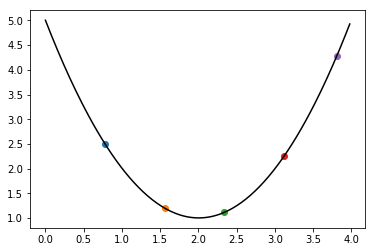

In [16]:
input_data = sp.Matrix([[0.78, 1.56, 2.34, 3.12, 3.81],
                                [2.50, 1.20, 1.12, 2.25, 4.28]])
print(input_data)
#c0, c1, x = sp.symbols('c0, c1, x')
#approximating_polynomial = c0 + c1*x
#c = approximating_polynomial.coeff(c0, 1)
#r = discrete_dotProduct(c, input_data.row(0), c, input_data.row(0))

t = generate_approx_polynomial(3)
s = generate_linear_equations(t, input_data)
s = tuple(s)[0]
a = t[1]
for i in range(0, len(t[0]), 1):
    a = a.subs(t[0][i], s[i])
print(a)
#print(t)
#print(s)
data1 = calculate_func(a, input_data.row(0))
#print(data1)
#sp.plot(a, (x, 0, 4))

t2 = np.arange(0.0, 4.0, 0.02)
plt.plot(input_data.row(0), input_data.row(1), 'o', t2, list(calculate_func(a, t2).row(1)), 'k')
plt.show()


Matrix([[0, pi/3, pi/2, 2*pi/3, pi], [1, 8/9, 3/4, 5/9, 0]])
Matrix([[1, 8/9, 3/4, 5/9, 0]])
Matrix([[0, pi/3, pi/2, 2*pi/3, pi]])
Matrix([[0, pi/3, pi/2, 2*pi/3, pi]])
Matrix([[1, 8/9, 3/4, 5/9, 0]])
Matrix([[0, pi/3, pi/2, 2*pi/3, pi]])
[5.0*c0 - 3.19444444444444, 2.5*c1 - 1.16666666666667]
0.466666666666668*cos(x) + 0.638888888888888
(0.638888888888888, 0.466666666666668)
Matrix([[0, pi/3, pi/2, 2*pi/3, pi], [1.10555555555556, 0.872222222222222, 0.638888888888888, 0.405555555555554, 0.172222222222220]])


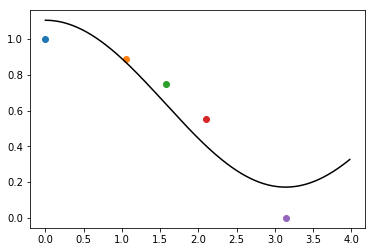

In [21]:
x_data = [0, sp.pi/3, sp.pi/2, sp.pi*2/3, sp.pi]
x, c0, c1 = sp.symbols('x, c0, c1')
coeffs = [c0, c1]
func = 1 - x**2/sp.pi**2
data = calculate_func(func, x_data)
print(data)
polynomial = "c0 + c1*cos(x)"
polynomial = sp.sympify(polynomial)
#pol = generate_approx_polynomial(5)


s = generate_linear_equations((coeffs, polynomial), data)
#s = generate_linear_equations(pol, data)
s = tuple(s)[0]
a = polynomial
for i in range(0, len(coeffs), 1):
    a = a.subs(coeffs[i], s[i])
print(a)
print(s)
data1 = calculate_func(a, x_data)
print(data1)
# sp.plot(a, (x, 0, 5))
# plt.plot(data.row(0), data.row(1), 'o')
t2 = np.arange(0.0, 4.0, 0.02)
plt.plot(data.row(0), data.row(1), 'o', t2, list(calculate_func(a, t2).row(1)), 'k')
plt.show()

<IPython.core.display.Math object>

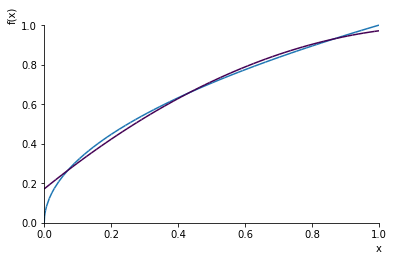

In [10]:
x = sp.symbols('x')
func = x**(1/2)
limits = (0, 1)
polynomial = generate_approx_polynomial(2)

solve = continuous_linear_equations(polynomial, limits, func)
coeffs = polynomial[0]
solve = tuple(solve)[0]
a = polynomial[1]
for i in range(0, len(coeffs), 1):
    a = a.subs(coeffs[i], solve[i])
c = sp.latex(a)
display(Math(c))
p = sp.plot(func, a, (x, 0, 1), show = False)
p[1].line_color = 0.1
p.show()

<IPython.core.display.Math object>

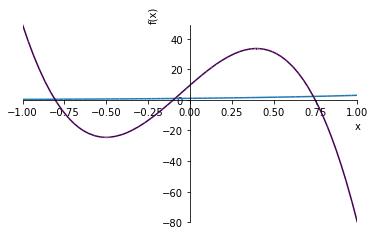

In [22]:
x = sp.symbols('x')
func = 3**x
limits = (-1, 1)
polynomial = generate_approx_polynomial(3)

solve = continuous_linear_equations(polynomial, limits, func)
coeffs = polynomial[0]
solve = tuple(solve)[0]
a = polynomial[1]
for i in range(0, len(coeffs), 1):
    a = a.subs(coeffs[i], solve[i])
c = sp.latex(a)
display(Math(c))
p = sp.plot(func, a, (x, -1, 1), show = False)
p[1].line_color = 0.1
p.show()

[15.0*c0 + 606.0*c1 + 25548.0*c2 - 429.0, 606.0*c0 + 25548.0*c1 + 1115808.0*c2 - 17371.0, 25548.0*c0 + 1115808.0*c1 + 50158200.0*c2 - 730123.0]
-0.04836081785833*x**2 + 3.83417004244091*x - 43.9323247383049


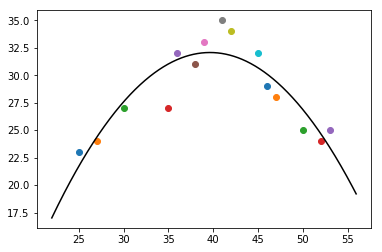

In [12]:
#ТВиМС стр 451 (регрессия)
input_data = sp.Matrix([[25, 27, 30, 35, 36, 38, 39, 41, 42, 45, 46, 47, 50, 52, 53],
                        [23, 24, 27, 27, 32, 31, 33, 35, 34, 32, 29, 28, 25, 24, 25]])

t = generate_approx_polynomial(2)
s = generate_linear_equations(t, input_data)
s = tuple(s)[0]
a = t[1]
for i in range(0, len(t[0]), 1):
    a = a.subs(t[0][i], s[i])
print(a)
#print(t)
#print(s)
data1 = calculate_func(a, input_data.row(0))
#print(data1)
#sp.plot(a, (x, 0, 4))

t2 = np.arange(22.0, 56.0, 0.05)
plt.plot(input_data.row(0), input_data.row(1), 'o', t2, list(calculate_func(a, t2).row(1)), 'k')
plt.show()


[4.0*c0 + 10.0*c1 + 30.0*c2 + 100.0*c3 + 354.0*c4 - 16.0, 10.0*c0 + 30.0*c1 + 100.0*c2 + 354.0*c3 + 1300.0*c4 - 50.0, 30.0*c0 + 100.0*c1 + 354.0*c2 + 1300.0*c3 + 4890.0*c4 - 170.0, 100.0*c0 + 354.0*c1 + 1300.0*c2 + 4890.0*c3 + 18700.0*c4 - 608.0, 354.0*c0 + 1300.0*c1 + 4890.0*c2 + 18700.0*c3 + 72354.0*c4 - 2246.0]
2.0*x - 1.0
([c0, c1, c2, c3, c4], c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4)
(-1.0, 2.0, 0, 0, 0)


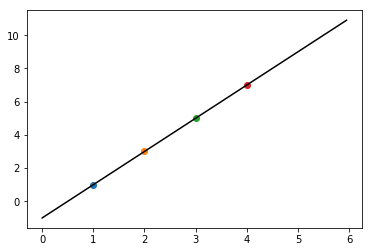

In [13]:
#memes
input_data = sp.Matrix([[1, 2, 3, 4],
                        [1, 3, 5, 7]])

t = generate_approx_polynomial(4)
s = generate_linear_equations(t, input_data)
s = tuple(s)[0]
a = t[1]
for i in range(0, len(t[0]), 1):
    a = a.subs(t[0][i], s[i])
print(a)
print(t)
print(s)
data1 = calculate_func(a, input_data.row(0))
#print(data1)
#sp.plot(a, (x, 0, 4))

t2 = np.arange(0.0, 6.0, 0.05)
plt.plot(input_data.row(0), input_data.row(1), 'o', t2, list(calculate_func(a, t2).row(1)), 'k')
plt.show()